In [2]:
from facenet_pytorch import MTCNN
import torch
import numpy as np
import mmcv, cv2
from PIL import Image, ImageDraw
from IPython import display

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [4]:
mtcnn = MTCNN(keep_all=True, device=device)

In [5]:
video = mmcv.VideoReader('video.mp4')
frames = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video]
display.Video('video.mp4', width=640)
video_ex_news = mmcv.VideoReader('video_ex_news.mp4')
frames_news = [Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)) for frame in video_ex_news]
display.Video('video_ex_news.mp4', width=640)


In [6]:
frames_tracked = []
total_frames = len(frames)
for i, frame in enumerate(frames):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    try:
        for box in boxes:
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
        # Add to frame list
        frames_tracked.append(frame_draw.resize((640, 360), Image.BILINEAR))
    except TypeError:
        continue
frames_tracked_news=[]
total_frames = len(frames_news)
for i, frame in enumerate(frames_news):
    print('\rTracking frame: {}'.format(i + 1), end='')
    
    # Detect faces
    boxes, _ = mtcnn.detect(frame)
    
    # Draw faces
    frame_draw = frame.copy()
    draw = ImageDraw.Draw(frame_draw)
    try:
        for box in boxes:
            draw.rectangle(box.tolist(), outline=(255, 0, 0), width=6)
    
        # Add to frame list
        frames_tracked_news.append(frame_draw.resize((640, 360), Image.BILINEAR))
    except TypeError:
        continue
print('\nDone')


Tracking frame: 370
Done


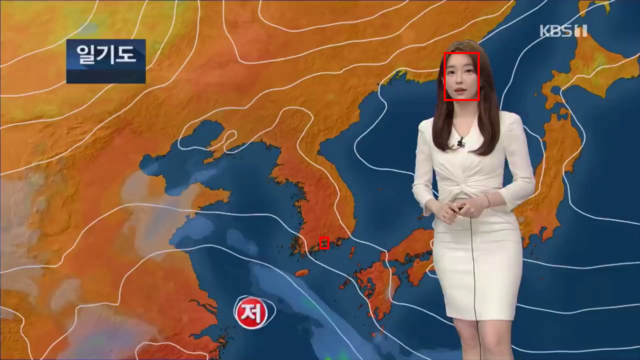

In [7]:
d = display.display(frames_tracked[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked[i % len(frames_tracked)])
        i += 1
except KeyboardInterrupt:
    pass

In [8]:
dim = frames_tracked[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked = cv2.VideoWriter('video_tracked.mp4', fourcc, 25.0, dim)
for frame in frames_tracked:
    video_tracked.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked.release()

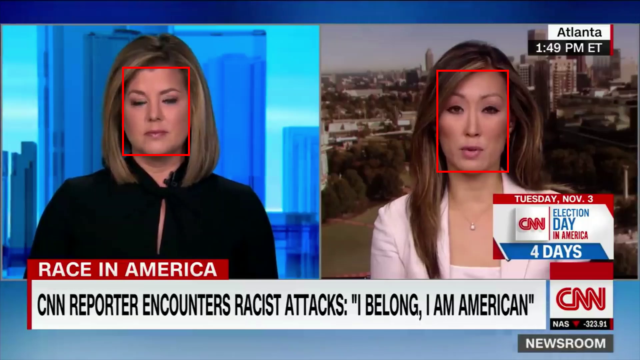

In [9]:
d = display.display(frames_tracked_news[0], display_id=True)
i = 1
try:
    while True:
        d.update(frames_tracked_news[i % len(frames_tracked_news)])
        i += 1
except KeyboardInterrupt:
    pass

In [13]:
dim1 = frames_tracked_news[0].size
fourcc = cv2.VideoWriter_fourcc(*'FMP4')    
video_tracked_news = cv2.VideoWriter('video_tracked_news.mp4', fourcc, 25.0, dim1)
for frame in frames_tracked_news:
    video_tracked_news.write(cv2.cvtColor(np.array(frame), cv2.COLOR_RGB2BGR))
video_tracked_news.release()